# Project Based On : {Sales Analysis}

### objectives

**Analyze historical sales data to uncover patterns and trends across products, regions, and time periods.
Examine customer purchasing habits to identify key and their preferences.
Evaluate the performance of different product categories to identify top-performing and underperforming items.
Assess sales fluctuations during peak and off-peak seasons to develop effective promotional strategies.
Provide actionable insights to drive revenue growth by targeting high-potential markets and optimizing pricing strategies.**

### import Libraries
**pandas: For data manipulation.
seaborn: For creating the plot.
matplotlib.pyplot: For general plotting functions.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px

### 4)Reading the file

In [2]:
df = pd.read_excel("SalesData.xlsx")
df.head()

,Date,Year,Day,Month,Year2,Customer_Age,Age_Group,Customer_Gender,Country,State,...,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Salary,profit2
0,2013-11-26,2013,26,November,2013,19,15-20,M,Canada,British Columbia,...,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120,590,360,950,NaN,NaN
1,2015-11-26,2015,26,November,2015,19,15-20,M,Canada,British Columbia,...,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120,590,360,950,NaN,NaN
2,2014-03-23,2014,23,March,2014,49,45-50,M,Australia,New South Wales,...,Bike Racks,Hitch Rack - 4-Bike,23.0,45.0,120,1366,1035,2401,NaN,NaN
3,2016-03-23,2016,23,March,2016,49,45-50,M,Australia,New South Wales,...,Bike Racks,Hitch Rack - 4-Bike,20.0,45.0,120,1188,900,2088,NaN,NaN
4,2014-05-15,2014,15,May,2014,47,45-50,F,Australia,New South Wales,...,Bike Racks,Hitch Rack - 4-Bike,4.0,45.0,120,238,180,418,NaN,NaN


In [3]:
df.shape

(113036, 21)

### 5)Data Cleaning Part

In [4]:
# count = df['Unit_Cost'].isnull()
# count.sum()
#counted the total null value
count_null = df.isnull().sum()
count_null

Date                     0
Year                     0
Day                      0
Month                    0
Year2                    0
Customer_Age             0
Age_Group                0
Customer_Gender          0
Country                  3
State                    0
Product_Category         0
Sub_Category             0
Product                  0
Order_Quantity           5
Unit_Cost                5
Unit_Price               0
Profit                   0
Cost                     0
Revenue                  0
Salary              113036
profit2             113036
dtype: int64

In [5]:
#checking total filled values
#but we can see that 2 columns are not needed salary and profit 
df.notnull().sum() 

Date                113036
Year                113036
Day                 113036
Month               113036
Year2               113036
Customer_Age        113036
Age_Group           113036
Customer_Gender     113036
Country             113033
State               113036
Product_Category    113036
Sub_Category        113036
Product             113036
Order_Quantity      113031
Unit_Cost           113031
Unit_Price          113036
Profit              113036
Cost                113036
Revenue             113036
Salary                   0
profit2                  0
dtype: int64

In [6]:
#droping the columns that are empty(y axis)
df.drop(['Salary','profit2'],axis=1, inplace = True)

In [7]:
#after droping 2 columns there no column with the name for ['Salary'&'profit2']
count = df.isnull().sum()
count

Date                0
Year                0
Day                 0
Month               0
Year2               0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             3
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      5
Unit_Cost           5
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [8]:
# know we have to Delete Rows with NA
df.dropna(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113028 entries, 0 to 113035
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113028 non-null  datetime64[ns]
 1   Year              113028 non-null  int64         
 2   Day               113028 non-null  int64         
 3   Month             113028 non-null  object        
 4   Year2             113028 non-null  int64         
 5   Customer_Age      113028 non-null  int64         
 6   Age_Group         113028 non-null  object        
 7   Customer_Gender   113028 non-null  object        
 8   Country           113028 non-null  object        
 9   State             113028 non-null  object        
 10  Product_Category  113028 non-null  object        
 11  Sub_Category      113028 non-null  object        
 12  Product           113028 non-null  object        
 13  Order_Quantity    113028 non-null  float64       
 14  Unit_Cost

In [10]:
#after performing dropna(inplace=True) our NA data has been deleted permanently
count_null = df.isnull().sum()
count_null

Date                0
Year                0
Day                 0
Month               0
Year2               0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [11]:
#We have changed the type from float to int data type 
df['Order_Quantity']=df['Order_Quantity'].astype(int)
df['Unit_Cost']=df['Unit_Cost'].astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113028 entries, 0 to 113035
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113028 non-null  datetime64[ns]
 1   Year              113028 non-null  int64         
 2   Day               113028 non-null  int64         
 3   Month             113028 non-null  object        
 4   Year2             113028 non-null  int64         
 5   Customer_Age      113028 non-null  int64         
 6   Age_Group         113028 non-null  object        
 7   Customer_Gender   113028 non-null  object        
 8   Country           113028 non-null  object        
 9   State             113028 non-null  object        
 10  Product_Category  113028 non-null  object        
 11  Sub_Category      113028 non-null  object        
 12  Product           113028 non-null  object        
 13  Order_Quantity    113028 non-null  int64         
 14  Unit_Cost

##### From till here we have completed the data cleaning Part

### 6)Visualization

In [13]:
df.head()

,Date,Year,Day,Month,Year2,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,2013,26,November,2013,19,15-20,M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,2015,26,November,2015,19,15-20,M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,2014,23,March,2014,49,45-50,M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,2016,23,March,2016,49,45-50,M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,2014,15,May,2014,47,45-50,F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [14]:
unique_country = df['Country'].unique()
unique_country

array(['Canada', 'Australia', 'United States', 'Germany', 'France',
       'United Kingdom'], dtype=object)

In [15]:
df.columns

Index(['Date', 'Year', 'Day', 'Month', 'Year2', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')

##### Most orders are by genders-M

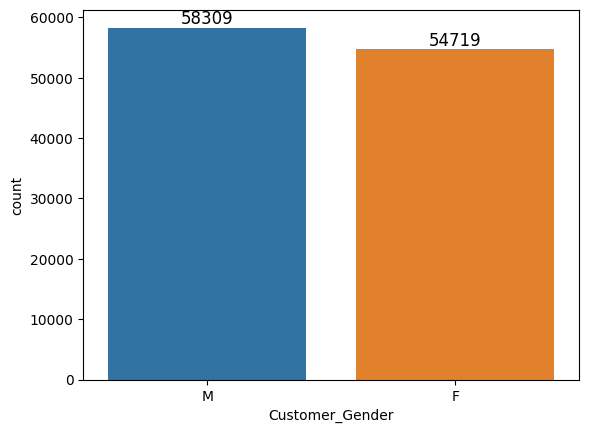

In [16]:
"""we have use seaborn for graphical representation"""
sn=sb.countplot(x='Customer_Gender',data =df,hue='Customer_Gender')
for i in sn.containers:
    sn.bar_label(i,fontsize=12)



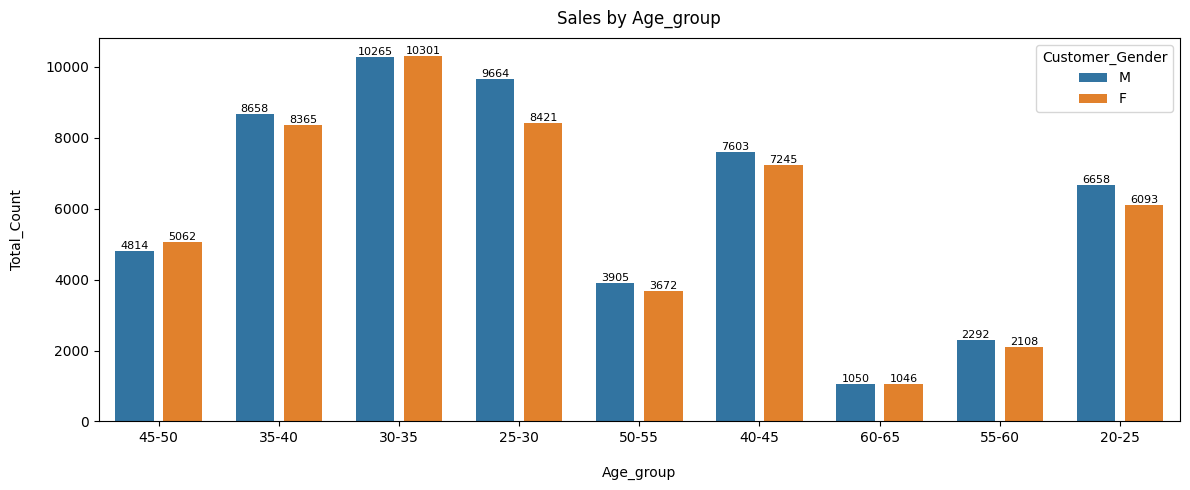

In [17]:
plt.figure(figsize=(12, 5))
sn=sb.countplot(x='Age_Group',data =df,hue='Customer_Gender',gap=0.2)
for i in sn.containers:
    sn.bar_label(i,fontsize=8)
plt.xlim(.5, len(df['Age_Group'].unique()) - 5.5)   #Adjust the x-axis limits to add more space
plt.title('Sales by Age_group', pad=10)  # Add spacing above the title
plt.xlabel('Age_group', labelpad=15)      # Add spacing below the x-axis label
plt.ylabel('Total_Count', labelpad=15)        # Add spacing to the left of the y-axis label

plt.tight_layout()  # Automatically adjust subplot parameters for better spacing
plt.show()

#### purchasing power age group of 25-40 is high as compared to others.

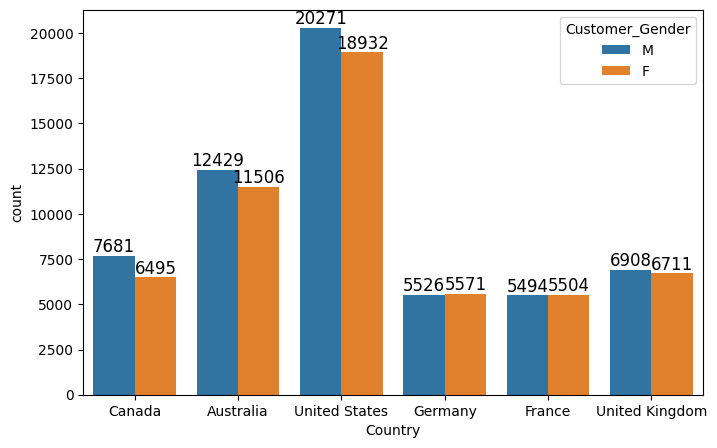

In [18]:
plt.figure(figsize=(8, 5))
sn=sb.countplot(x='Country',data =df,hue='Customer_Gender')
for i in sn.containers:
    sn.bar_label(i,fontsize=12)

#### Most buyers are from us,australia & canada

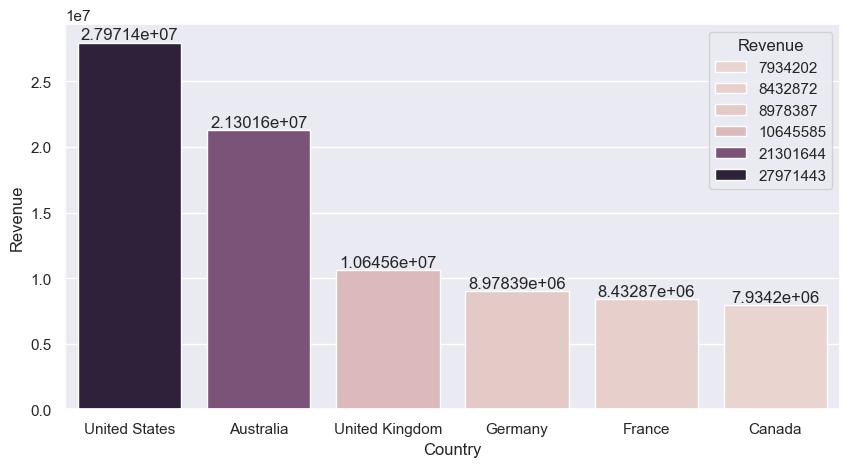

In [19]:
grp = df.groupby(['Country'], as_index=False)['Revenue'].sum().sort_values(by=['Revenue'],ascending=False).head(10)
sb.set(rc={'figure.figsize': (10,5)})
cb=sb.barplot(x='Country',y='Revenue',data=grp,hue='Revenue')
for count_bar in cb.containers:
    cb.bar_label(count_bar)

In [20]:
import pandas as pd
import plotly.express as px

# 1: Aggregate Data (Sum revenue at the country level)
df_aggregated = df.groupby('Country', as_index=False).agg({
    'Revenue': 'sum',          # Summing revenue for each country
    'Country': 'first'    # Keeping the country name
})

df_year = df.groupby('Year', as_index=False).agg({
            # Summing revenue for each year
    'Year': 'first'    # Keeping the year
})

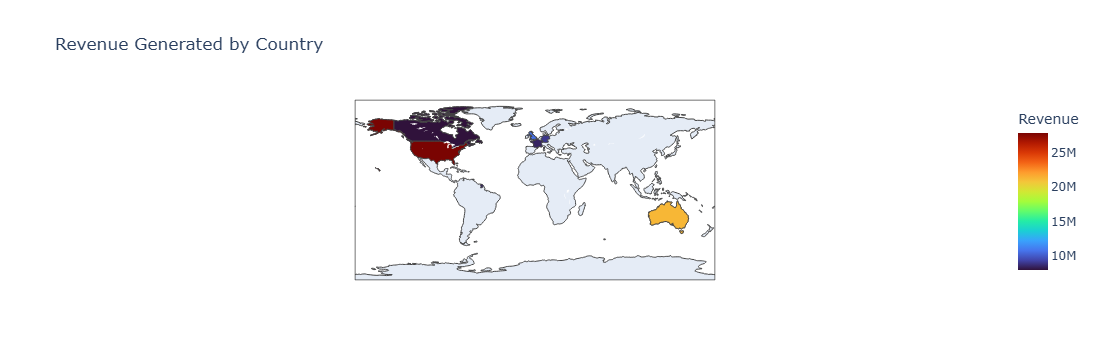

In [32]:
# 2: Reduce Map Complexity (Select top 20 countries by revenue)
top_countries = df_aggregated.nlargest(20, 'Revenue')  # Adjust the number as needed

# 3: Precompute Data (Ensure no dynamic calculations in plotting)

# 4: Create the Choropleth Map
fig = px.choropleth(
                    top_countries, 
                    locations='Country',    # ISO country codes
                    locationmode='country names',        # Use ISO-3 codes
                    color='Revenue',             # Revenue column
                    hover_name='Country',   # Country name column
                    color_continuous_scale=px.colors.sequential.Turbo,
                    title="Revenue Generated by Country")
fig.show()

In [22]:
df.columns

Index(['Date', 'Year', 'Day', 'Month', 'Year2', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')

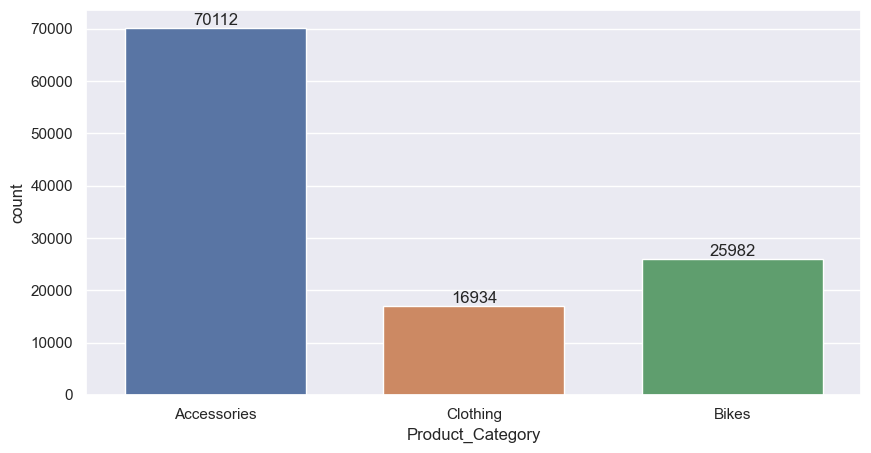

In [23]:
#to find most selling products in the product_categories
count_plot=sb.countplot(x='Product_Category',data=df,hue='Product_Category',width=0.7)
for bars in count_plot.containers:
    count_plot.bar_label(bars)

#### most selling products in the product_categories


In [24]:
grp2=df.groupby('Product_Category',as_index=False)['Revenue'].sum().sort_values(by='Revenue',ascending=False)
grp2

,Product_Category,Revenue
1,Bikes,61782134
0,Accessories,15111117
2,Clothing,8370882


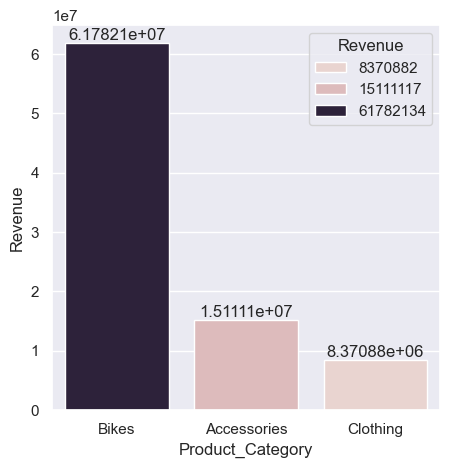

In [25]:
grp2=df.groupby('Product_Category',as_index=False)['Revenue'].sum().sort_values(by='Revenue',ascending=False)
sb.set(rc={'figure.figsize':(5,5)})
label = sb.barplot(x='Product_Category',y='Revenue',data=grp2,hue='Revenue')
for bars in label.containers:
    label.bar_label(bars)


In [26]:
df['State'].unique()

array(['British Columbia', 'New South Wales', 'Victoria', 'Oregon',
       'California', 'Saarland', 'Seine Saint Denis', 'Moselle',
       'Queensland', 'England', 'Nord', 'Washington', 'Hessen',
       'Nordrhein-Westfalen', 'Hamburg', 'Loir et Cher', 'Kentucky',
       'Seine (Paris)', 'South Australia', 'Loiret', 'Alberta', 'Bayern',
       'Hauts de Seine', 'Yveline', 'Essonne', "Val d'Oise", 'Tasmania',
       'Seine et Marne', 'Val de Marne', 'Pas de Calais',
       'Charente-Maritime', 'Garonne (Haute)', 'Brandenburg', 'Texas',
       'New York', 'Florida', 'Somme', 'Illinois', 'South Carolina',
       'North Carolina', 'Georgia', 'Virginia', 'Ohio', 'Ontario',
       'Wyoming', 'Missouri', 'Montana', 'Utah', 'Minnesota',
       'Mississippi', 'Massachusetts', 'Arizona', 'Alabama'], dtype=object)

In [27]:
grp2=df.groupby('State',as_index=False)['Revenue'].sum().sort_values(by='Revenue',ascending=False).head(7)
grp2


,State,Revenue
6,California,17668516
8,England,10645585
26,New South Wales,9203080
5,British Columbia,7876354
50,Washington,6741510
35,Queensland,5066267
48,Victoria,5054839


In [28]:
import plotly.express as px
import pandas as pd

# Aggregate the data by State
aggregated_data = df.groupby("State", as_index=False)["Revenue"].sum()

# Sort by Revenue in descending order and select top 7
top_states = aggregated_data.sort_values(by="Revenue", ascending=False).head(7)

# Create a funnel chart
fig = px.funnel(
    top_states,
    x="Revenue",  # Revenue values
    y="State",    # States
    title="Top 7 State-wise Revenue                                         Funnel Chart",
    labels={"Revenue": "Revenue (in $)", "State": "States"}
)

# Display the funnel chart
fig.show()


In [29]:
import plotly.express as px
import pandas as pd

# Aggregate the data by Year
aggregated_data = df.groupby("Year", as_index=False)["Revenue"].sum()

# Create a line chart
fig = px.line(
    aggregated_data,
    x="Year",           # X-axis: Years
    y="Revenue",        # Y-axis: Revenue
    title="Year-wise Revenue",
    labels={"Revenue": "Revenue", "Year": "Year"},
    markers=True        # Adds markers on the data points
)

# Display the line chart
fig.show()


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113028 entries, 0 to 113035
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113028 non-null  datetime64[ns]
 1   Year              113028 non-null  int64         
 2   Day               113028 non-null  int64         
 3   Month             113028 non-null  object        
 4   Year2             113028 non-null  int64         
 5   Customer_Age      113028 non-null  int64         
 6   Age_Group         113028 non-null  object        
 7   Customer_Gender   113028 non-null  object        
 8   Country           113028 non-null  object        
 9   State             113028 non-null  object        
 10  Product_Category  113028 non-null  object        
 11  Sub_Category      113028 non-null  object        
 12  Product           113028 non-null  object        
 13  Order_Quantity    113028 non-null  int64         
 14  Unit_Cost

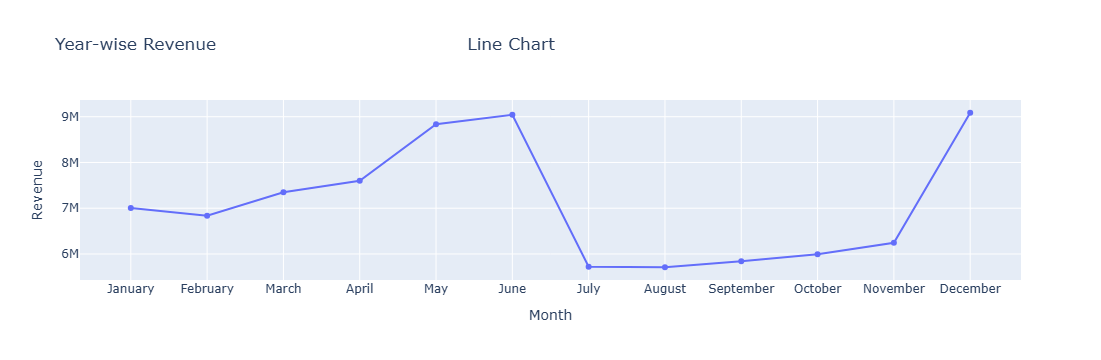

In [31]:
import plotly.express as px
import pandas as pd

# Convert Month names to a proper datetime format for sorting
df["Month"] = pd.Categorical(df["Month"], categories=[
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
], ordered=True)

# Sort the data by Month
df = df.sort_values("Month")


# Aggregate the data by Month (with observed=False to maintain current behavior)
aggregated_data = df.groupby("Month", as_index=False, observed=False)["Revenue"].sum()
# Aggregate the data by Year
# aggregated_data = df.groupby("Month", as_index=False)["Revenue"].sum()

# Create a line chart
fig = px.line(
    aggregated_data,
    x="Month",           # X-axis: Years
    y="Revenue",        # Y-axis: Revenue
    title="Year-wise Revenue                                          Line Chart",
    labels={"Revenue": "Revenue", "Month": "Month"},
    markers=True        # Adds markers on the data points
)


fig.show()


### 7)conclusion:

**From the data, we observe that males aged 25-40 in the United States, Australia, and Canada have higher purchasing power. The top-selling products are accessories and bikes, with bikes contributing the most revenue. Peak sales months are April, May, June, and December, indicating these months are key for driving revenue. To further grow the company, it would be beneficial to focus on the period from July to November by offering promotions and special deals to boost sales during this slower period.**